# Algoritmo de Shor

## Algoritmo para encontrar a ordem

Dados dois números naturais
$$g,N\in\mathbb{N},\ \gcd(g,N)=1,\ g < N,$$
a __ordem__ de $g$ módulo $N$ é o menor número natural $\tau$ tal que
$$g^\tau = 1(\bmod N).$$

Abaixo está mostrado um gráfico da função
$$f(\tau) = g^\tau(\bmod N)$$
para o exemplo
$$g=3,\ N=35.$$ Vemos assim que o período dessa função é
$$\tau=12.$$

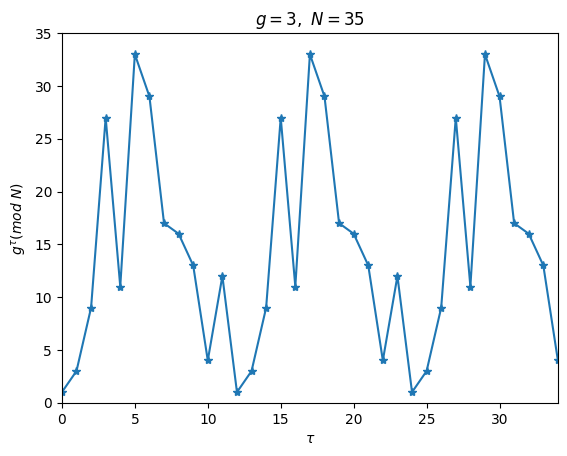

In [1]:
import numpy as np
import matplotlib.pyplot as plt
g = 3; N = 35
tau = np.arange(0,N,1); gt = g**tau % N
plt.plot(tau,gt, '-*')
plt.xlabel(r'$\tau$'); plt.ylabel(r'$g^\tau(mod\ N)$')
plt.xlim(0,N-1); plt.ylim(0,N)
plt.title(r'$g=3,\ N=35$')
plt.show()

Agora vem a questão de como podemos fazer esse cálculo usando um computador quântico. Vamos começar considerando um operador unitário que atua da seguinte forma na base computacional de
$$n = \lceil\log_2(N)\rceil$$
qubits:
$$U|y\rangle = \begin{cases} |(g\times y)(\bmod N)\rangle,\ y=0,\cdots,N-1 \\ |y\rangle,\ \text{outros casos}  \end{cases}.$$

Essa transformação é unitária. Para verificar essa afirmação, basta notar que, como $g$ e $N$ são coprimos, existe a multiplicativa $g^{-1}$ inversa de $g$ módulo $N$ talque que
$$g^{-1}\times g = 1(\bmod N).$$
Vemos assim que
\begin{align}
& U^{-1}U|y\rangle = U^{-1}|(g\times y)(\bmod N)\rangle \\
& := |(g^{-1}\times(g\times y))(\bmod N)\rangle = |((g^{-1}\times g)\times y))(\bmod N)\rangle = |(1\times y))(\bmod N)\rangle \\
& = |y(\bmod N)\rangle = |y\rangle
\end{align}
para $y=0,\cdots,N-1$.

No subespço ortogonal ao gerado pelos estados $\{|0\times g(\bmod N)\rangle,|1\times g(\bmod N)\rangle,\cdots,|(N-1)\times g(\bmod N)\rangle\}$, tanto $U$ com $U^{-1}$ atuam como a identidade.

No subespaço não trivial, $U$ definida acima atua como uma __matriz de permutação__. E toda matrix de permutação é unitária.

Quando atua no subespaço gerado por $\{|0\times g(\bmod N)\rangle,|1\times g(\bmod N)\rangle,\cdots,|(N-1)\times g(\bmod N)\rangle\}$, o operador unitário definido acima é tal que
\begin{align}
& U^2|y\rangle = U|(g\times y)(\bmod N)\rangle = |(g^2\times y)(\bmod N)\rangle, \\
& U^3|y\rangle = U|(g^2\times y)(\bmod N)\rangle = |(g^3\times y)(\bmod N)\rangle, \\
& \vdots \\
& U^j|y\rangle = U|(g^{j-1}\times y)(\bmod N)\rangle = |(g^j\times y)(\bmod N)\rangle, \\
\end{align}
Então, se começamos com os qubits preparados no estado
$$|1\rangle$$
da base decimal, teremos que no espaço não trivial a ação do operador unitário é:
$$U^j|1\rangle = |g^j(\bmod N)\rangle.$$

Temos assim uma unitária que prepara os estados $|g^j(\bmod N)\rangle$, que serão úteis para obtermos o período $\tau$ de $g$ módulo $N$.

Assim, para
$$g=3,\ N=35,$$
teremos, por exemplo, que
\begin{align}
& U^0|1\rangle = |3^0(\bmod 35)\rangle = |1\rangle, \\
& U^1|1\rangle = |3^1(\bmod 35)\rangle = |3\rangle = U|1\rangle, \\
& U^2|1\rangle = |3^2(\bmod 35)\rangle = |9\rangle = U|3\rangle, \\
& U^3|1\rangle = |3^3(\bmod 35)\rangle = |27\rangle = U|9\rangle, \\
& U^4|1\rangle = |3^4(\bmod 35)\rangle = |11\rangle = U|27\rangle, \\
& U^5|1\rangle = |3^5(\bmod 35)\rangle = |33\rangle = U|11\rangle, \\
& U^6|1\rangle = |3^6(\bmod 35)\rangle = |29\rangle = U|33\rangle, \\
& U^7|1\rangle = |3^7(\bmod 35)\rangle = |17\rangle = U|29\rangle, \\
& U^8|1\rangle = |3^8(\bmod 35)\rangle = |16\rangle = U|17\rangle, \\
& U^8|1\rangle = |3^9(\bmod 35)\rangle = |13\rangle = U|16\rangle, \\
& U^{10}|1\rangle = |3^{10}(\bmod 35)\rangle = |4\rangle = U|13\rangle, \\
& U^{11}|1\rangle = |3^{11}(\bmod 35)\rangle = |12\rangle = U|4\rangle, \\
& U^{12}|1\rangle = |3^{12}(\bmod 35)\rangle = |1\rangle = U|12\rangle.
\end{align}

In [3]:
list_gx = []
for j in range(0,13):
  list_gx.append(3**j)
print(list_gx)

[1, 3, 9, 27, 81, 243, 729, 2187, 6561, 19683, 59049, 177147, 531441]


In [4]:
list_gx = []
for j in range(0,13):
  list_gx.append(3**j % 35)
print(list_gx)

[1, 3, 9, 27, 11, 33, 29, 17, 16, 13, 4, 12, 1]


Temos assim que
$$U^\tau|1\rangle = |1\rangle$$
para o período
$$\tau=12.$$

Do exemplo acima, notamos que $U$ atuando em qualquer um dos estados do conjunto
$$\{|1\rangle,|3\rangle,|9\rangle,|27\rangle,|11\rangle,|33\rangle,|29\rangle,|17\rangle,|16\rangle,|13\rangle,|4\rangle,|12\rangle\}$$
resulta em um estado do mesmo conjunto. Então, se consideramos a seguinte superposição de estados desse conjunto
\begin{align}
& |u_0\rangle = \frac{1}{\sqrt{\tau}}\sum_{j=0}^{\tau-1} |g^j(\bmod N)\rangle \\
& = \frac{1}{\sqrt{12}}\big(|1\rangle+|3\rangle+|9\rangle+|27\rangle+|11\rangle+|33\rangle+|29\rangle+|17\rangle+|16\rangle+|13\rangle+|4\rangle+|12\rangle\big)
\end{align}
Teremos que
\begin{align}
& U|u_0\rangle = \frac{1}{\sqrt{\tau}}\sum_{j=0}^{\tau-1} U|g^j(\bmod N)\rangle \\
& = \frac{1}{\sqrt{12}}\big(U|1\rangle+U|3\rangle+U|9\rangle+U|27\rangle+U|11\rangle+U|33\rangle+U|29\rangle+U|17\rangle+U|16\rangle+U|13\rangle+U|4\rangle+U|12\rangle\big) \\
& = \frac{1}{\sqrt{12}}\big(|3\rangle+|9\rangle+|27\rangle+|11\rangle+|33\rangle+|29\rangle+|17\rangle+|16\rangle+|13\rangle+|4\rangle+|12\rangle+|1\rangle\big) \\
& = (+1)|u_0\rangle.
\end{align}
Ou seja, $|u_0\rangle$ é autovetor de $U$ correspondente ao autovalor $+1=e^{i0}$:
$$U|u_0\rangle = e^{2\pi i 0/\tau}|u_0\rangle.$$

Consideramos agora uma superposição de estados mais interessante do conjunto acima:
\begin{align}
& |u_1\rangle = \frac{1}{\sqrt{\tau}}\sum_{j=0}^{\tau-1} e^{-2\pi i j/\tau}|g^j(\bmod N)\rangle \\
& = \frac{1}{\sqrt{12}}\big(|1\rangle+e^{-2\pi i/\tau}|3\rangle+ e^{-2\pi i 2/\tau}|9\rangle+ e^{-2\pi i 3/\tau}|27\rangle+ e^{-2\pi i 4/\tau}|11\rangle+ e^{-2\pi i 5/\tau}|33\rangle+ e^{-2\pi i 6/\tau}|29\rangle+ e^{-2\pi i 7/\tau}|17\rangle+ e^{-2\pi i 8/\tau}|16\rangle+ e^{-2\pi i 9/\tau}|13\rangle+ e^{-2\pi i 10/\tau}|4\rangle+e^{-2\pi i 11/\tau}|12\rangle\big) \\
& = \frac{1}{\sqrt{12}}\big(|1\rangle+e^{-2\pi i/\tau}|3\rangle+ e^{-4\pi i/\tau}|9\rangle+ e^{-6\pi i/\tau}|27\rangle+ e^{-8\pi i/\tau}|11\rangle+ e^{-10\pi i/\tau}|33\rangle+ e^{-12\pi i/\tau}|29\rangle+ e^{-14\pi i/\tau}|17\rangle+ e^{-16\pi i/\tau}|16\rangle+ e^{-18\pi i/\tau}|13\rangle+ e^{-20\pi i/\tau}|4\rangle+e^{-22\pi i/\tau}|12\rangle\big)
\end{align}
Teremos que
\begin{align}
& U|u_1\rangle = \frac{1}{\sqrt{\tau}}\sum_{j=0}^{\tau-1} e^{-2\pi i j/\tau} U|g^j(\bmod N)\rangle \\
& = \frac{1}{\sqrt{12}}\big(U|1\rangle+e^{-2\pi i/\tau}U|3\rangle+ e^{-2\pi i 2/\tau}U|9\rangle+ e^{-2\pi i 3/\tau}U|27\rangle+ e^{-2\pi i 4/\tau}U|11\rangle + e^{-2\pi i 5/\tau}U|33\rangle + e^{-2\pi i 6/\tau}U|29\rangle + e^{-2\pi i 7/\tau}U|17\rangle + e^{-2\pi i 8/\tau}U|16\rangle + e^{-2\pi i 9/\tau}U|13\rangle + e^{-2\pi i 10/\tau}U|4\rangle + e^{-2\pi i 11/\tau}U|12\rangle\big) \\
& = \frac{1}{\sqrt{12}}\big(|3\rangle+e^{-2\pi i/\tau}|9\rangle+ e^{-2\pi i 2/\tau}|27\rangle+ e^{-2\pi i 3/\tau}|11\rangle+ e^{-2\pi i 4/\tau}|33\rangle + e^{-2\pi i 5/\tau}|29\rangle + e^{-2\pi i 6/\tau}|17\rangle + e^{-2\pi i 7/\tau}|16\rangle + e^{-2\pi i 8/\tau}|13\rangle + e^{-2\pi i 9/\tau}|4\rangle + e^{-2\pi i 10/\tau}|12\rangle + e^{-2\pi i 11/\tau}|1\rangle\big) \\
& = e^{2\pi i /\tau}\frac{1}{\sqrt{12}}\big(e^{-2\pi i /\tau}|3\rangle+e^{-4\pi i/\tau}|9\rangle+ e^{-6\pi i /\tau}|27\rangle+ e^{-8\pi i /\tau}|11\rangle+ e^{-10\pi i /\tau}|33\rangle + e^{-12\pi i /\tau}|29\rangle + e^{-14\pi i /\tau}|17\rangle + e^{-16\pi i /\tau}|16\rangle + e^{-18\pi i /\tau}|13\rangle + e^{-20\pi i /\tau}|4\rangle + e^{-22\pi i /\tau}|12\rangle + |1\rangle\big) \\
& = e^{2\pi i /\tau}|u_1\rangle.
\end{align}
Acima usamos que
$$e^{-24\pi i /\tau} = e^{-24\pi i /12} = \cos(-2\pi)+i\sin(-2\pi)=1.$$
Ou seja, $|u_1\rangle$ é autovetor de $U$ correspondente ao autovalor $e^{2\pi i /\tau}=e^{2\pi i /12}$:
$$U|u_1\rangle = e^{2\pi i/\tau}|u_1\rangle.$$
Vemos assim que $\tau=12$ aparece no denominador do autovalor de $U$.

Consideramos agora uma superposição de estados mais genérica do conjunto acima:
\begin{align}
& |u_k\rangle = \frac{1}{\sqrt{\tau}}\sum_{j=0}^{\tau-1} e^{-2\pi i jk/\tau}|g^j(\bmod N)\rangle \\
& = \frac{1}{\sqrt{12}}\big(|1\rangle+e^{-2\pi ik/\tau}|3\rangle+ e^{-2\pi i 2k/\tau}|9\rangle+ e^{-2\pi i 3k/\tau}|27\rangle+ e^{-2\pi i 4k/\tau}|11\rangle+ e^{-2\pi i 5k/\tau}|33\rangle+ e^{-2\pi i 6k/\tau}|29\rangle+ e^{-2\pi i 7k/\tau}|17\rangle+ e^{-2\pi i 8k/\tau}|16\rangle+ e^{-2\pi i 9k/\tau}|13\rangle+ e^{-2\pi i 10k/\tau}|4\rangle+e^{-2\pi i 11k/\tau}|12\rangle\big) \\
& = \frac{1}{\sqrt{12}}\big(|1\rangle + e^{-2\pi ik/\tau}|3\rangle + e^{-4\pi i k/\tau}|9\rangle + e^{-6\pi i k/\tau}|27\rangle + e^{-8\pi i k/\tau}|11\rangle + e^{-10\pi i k/\tau}|33\rangle + e^{-12\pi i k/\tau}|29\rangle + e^{-14\pi i k/\tau}|17\rangle + e^{-16\pi i k/\tau}|16\rangle + e^{-18\pi i k/\tau}|13\rangle+ e^{-20\pi i k/\tau}|4\rangle + e^{-22\pi i k/\tau}|12\rangle\big)
\end{align}
para
$$0\le k\le \tau-1.$$
Teremos que
\begin{align}
& U|u_k\rangle = \frac{1}{\sqrt{\tau}}\sum_{j=0}^{\tau-1} e^{-2\pi i jk/\tau} U|g^j(\bmod N)\rangle \\
& = \frac{1}{\sqrt{12}}\big(U|1\rangle+e^{-2\pi ik/\tau}U|3\rangle+ e^{-2\pi i 2k/\tau}U|9\rangle+ e^{-2\pi i 3k/\tau}U|27\rangle+ e^{-2\pi i 4k/\tau}U|11\rangle + e^{-2\pi i 5k/\tau}U|33\rangle + e^{-2\pi i 6k/\tau}U|29\rangle + e^{-2\pi i 7k/\tau}U|17\rangle + e^{-2\pi i 8k/\tau}U|16\rangle + e^{-2\pi i 9k/\tau}U|13\rangle + e^{-2\pi i 10k/\tau}U|4\rangle + e^{-2\pi i 11k/\tau}U|12\rangle\big) \\
& = \frac{1}{\sqrt{12}}\big(|3\rangle+e^{-2\pi ik/\tau}|9\rangle+ e^{-2\pi i 2k/\tau}|27\rangle+ e^{-2\pi i 3k/\tau}|11\rangle+ e^{-2\pi i 4k/\tau}|33\rangle + e^{-2\pi i 5k/\tau}|29\rangle + e^{-2\pi i 6k/\tau}|17\rangle + e^{-2\pi i 7k/\tau}|16\rangle + e^{-2\pi i 8k/\tau}|13\rangle + e^{-2\pi i 9k/\tau}|4\rangle + e^{-2\pi i 10k/\tau}|12\rangle + e^{-2\pi i 11k/\tau}|1\rangle\big) \\
& = e^{2\pi i k/\tau}\frac{1}{\sqrt{12}}\big(e^{-2\pi i k/\tau}|3\rangle+e^{-4\pi ik/\tau}|9\rangle+ e^{-6\pi i k/\tau}|27\rangle+ e^{-8\pi i k/\tau}|11\rangle+ e^{-10\pi i k/\tau}|33\rangle + e^{-12\pi i k/\tau}|29\rangle + e^{-14\pi i k/\tau}|17\rangle + e^{-16\pi i k/\tau}|16\rangle + e^{-18\pi i k/\tau}|13\rangle + e^{-20\pi i k/\tau}|4\rangle + e^{-22\pi i k/\tau}|12\rangle + e^{-24\pi i k/\tau}|1\rangle\big) \\
& = e^{2\pi i k/\tau}|u_1\rangle.
\end{align}
Acima usamos que
$$e^{-24\pi i k/\tau} = e^{-24\pi i k/12} = \cos(-k2\pi)+i\sin(-k2\pi)=1.$$
Ou seja, $|u_k\rangle$ é autovetor de $U$ correspondente ao autovalor $e^{2\pi i k/\tau}=e^{2\pi i k/12}$:
$$U|u_k\rangle = e^{2\pi i k/\tau}|u_k\rangle.$$
Vemos assim que $k/\tau=k/12$ aparece no denominador do autovalor de $U$.

Seguindo, vamos "verificar" que a sumperposição, com coeficientes iguais, dos autovetores $|u_k\rangle$ de $U$ nos levam ao estado $|1\rangle$:
\begin{align}
\frac{1}{\sqrt{\tau}}\sum_{k=0}^{\tau-1}|u_k\rangle & = \frac{1}{\sqrt{\tau}}\sum_{k=0}^{\tau-1}\frac{1}{\sqrt{\tau}}\sum_{j=0}^{\tau-1} e^{-2\pi i jk/\tau}|g^j(\bmod N)\rangle \\
& = \frac{1}{\tau}\sum_{j=0}^{\tau-1} \Big(\sum_{k=0}^{\tau-1}e^{-2\pi i jk/\tau}\Big)|g^j(\bmod N)\rangle \\
& = \frac{1}{\tau}\sum_{j=0}^{\tau-1} \tau\delta_{j,0}|g^j(\bmod N)\rangle \\
& = |g^0(\bmod N)\rangle = |1(\bmod N)\rangle \\
& = |1\rangle.
\end{align}

Nos falta demonstrar que
$$\sum_{k=0}^{\tau-1}e^{-2\pi i jk/\tau}=\tau\delta_{j,0}$$
em geral. Começamos consideramos o caso $j=0$:
\begin{align}
\sum_{k=0}^{\tau-1}e^{-2\pi i jk/\tau} & = \sum_{k=0}^{\tau-1}e^{-2\pi i (0)k/\tau} =  \sum_{k=0}^{\tau-1}e^{0} = \sum_{k=0}^{\tau-1}(1) \\
& = \tau.
\end{align}
Usando a série geométrica
$$\sum_{k=0}^{n-1}ar^j = \frac{a(1-r^n)}{1-r},$$
consideremos o caso $j\ne 0$:
\begin{align}
\sum_{k=0}^{\tau-1}e^{-2\pi i jk/\tau} & = \sum_{k=0}^{\tau-1}\big(e^{-2\pi i j/\tau}\big)^k = \frac{1\big(1-\big(e^{-2\pi i j/\tau}\big)^\tau\big)}{1-e^{-2\pi i j/\tau}} = \frac{1-e^{-2\pi i j}}{1-e^{-2\pi i j/\tau}} \\
& = \frac{1-\cos(j2\pi)+ i \sin(j2\pi)}{1-e^{-2\pi i j/\tau}}  = \frac{1-1+ i (0)}{1-e^{-2\pi i j/\tau}} \\
& = 0.
\end{align}



Vamos lembrar que no _algoritmo de estimativa de fase_ quântica, para
$$U|u\rangle=e^{2\pi i\phi_u}|u\rangle,$$
tínhamos a seguinte sequência de operações
\begin{align}
& |0\rangle^{\otimes t}\otimes|u\rangle \xrightarrow{H^{\otimes t}\otimes I^{\otimes n}} |+\rangle^{\otimes t}\otimes|u\rangle \\
& \xrightarrow{\Pi_{j=1}^tC_{U^{2^{t-j}}}^{1\rightarrow (2ºr)}} 2^{-t/2}\big(|0\rangle_1+e^{2\pi i2^{t-1}\phi_u}|1\rangle_1 \big)\otimes\big(|0\rangle_2+e^{2\pi i2^{t-2}\phi_u}|1\rangle_2\big)\otimes\cdots\otimes\big(|0\rangle_{t}+e^{2\pi i2^{t-t}\phi_u}|1\rangle_{t}\big) \\
& \xrightarrow{F^\dagger} \approx |2^t \phi_u\rangle.
\end{align}
Medindo na base computacional, obtemos uma aproximação para a fase $\phi_u$.

Assim, relacionado ao problema de encontrar a ordem de $g$ módulo $N$, aplicando o algoritmo de estimativa de fase, preparando o estado $|1\rangle$ no lugar de $|u\rangle$, obteremos
$$|1\rangle=\frac{1}{\sqrt{\tau}}\sum_{k=0}^{\tau-1}|u_k\rangle \xrightarrow{QPE} \frac{1}{\sqrt{\tau}}\sum_{k=0}^{\tau-1}\Big|2^t \frac{k}{\tau}\Big\rangle.$$

Medindo na base computacional, conforme vimos no algoritmo de estimativa de fase, obteremos um estado $|b_k\rangle$ que é uma boa aproximação para
$$\frac{k}{\tau} \approx 2^{-t}b_k.$$
A partir desses valores, podemos utulizar o _algoritmo das frações continuadas_ para obter $\tau.$

### Implementação da unitária
$$U|y\rangle = |(gy)(\bmod N)\rangle$$

Até onde entendi, essa unitária precisa ser montada para cada par $(g,N).$ Vamos considerar o __exemplo__:
$$g=3,\ N=35,\ \therefore\ n = 6.$$
Nesse caso a dimensão é $d = 2^6 = 64$, mas lembremos que a dimensão do subespaço afetado por $U$ é $d_N = 35$. Qualquer estado que não está no subespaço gerado por $\{|g^j(\bmod N)\rangle\}_{j=0}^{N-1}$, não é afetado por $U$.

A ação de $U$ na base computacional é a seguinte
\begin{align}
U|0\rangle=|0\rangle,\ U|1\rangle=|3\rangle,\ U|2\rangle=|6\rangle, U|3\rangle=|9\rangle,\ U|4\rangle=|12\rangle,\ U|5\rangle=|15\rangle,\ U|6\rangle=|18\rangle,\ U|7\rangle=|21\rangle, U|8\rangle=|24\rangle, U|9\rangle=|27\rangle, U|10\rangle=|30\rangle, U|11\rangle=|33\rangle, U|12\rangle=|1\rangle, U|13\rangle=|4\rangle, U|14\rangle=|7\rangle, U|15\rangle=|10\rangle, U|16\rangle=|13\rangle, U|17\rangle=|16\rangle, U|18\rangle=|19\rangle, U|19\rangle=|22\rangle, U|20\rangle=|25\rangle, U|21\rangle=|28\rangle, U|22\rangle=|31\rangle, U|23\rangle=|34\rangle, U|24\rangle=|2\rangle, U|25\rangle=|5\rangle, U|26\rangle=|8\rangle, U|27\rangle=|11\rangle, U|28\rangle=|14\rangle, U|29\rangle=|17\rangle, U|30\rangle=|20\rangle, U|31\rangle=|23\rangle, U|32\rangle=|26\rangle, U|33\rangle=|29\rangle, U|34\rangle=|32\rangle.
\end{align}

Está complicado para obter a matriz unitária nesse caso. Vamos tentar um exemplo mais fácil.

In [21]:
g = 3; N = 35; n = 6
list_Uy = []
for y in range(0,N):
  list_Uy.append(g*y % N)
print(list_Uy)

[0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 32]


In [22]:
from sympy import zeros
Uy = zeros(N,N)
for x in range(0,N):
  for y in range(0,N):
    if x == list_Uy[y]:
      Uy[x,y] = 1
Uy

Matrix([
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0, 0, 0, 0, 

Consideremos um __exemplo__ mais simples
$$N=6=2\times 3,\ g=5,\ n=3.$$
Usando $U^j|1\rangle = |g^j\bmod N\rangle$ temos que
\begin{align}
& U|1\rangle = |5\bmod 6\rangle = |5\rangle,\\
& U^2|1\rangle = |25\bmod 6\rangle = |1\rangle \\
& \therefore\ \tau =2.
\end{align}

Quanto a representação matricial, usando $U|y\rangle = |gy\bmod N\rangle,$ temos que
\begin{align}
& U|0\rangle = |0\rangle,\ U|1\rangle = |5\bmod 6\rangle = |5\rangle, \\
& U|2\rangle = |10\bmod 6\rangle = |4\rangle,\ U|2\rangle = |15\bmod 6\rangle = |3\rangle, \\
& U|4\rangle = |20\bmod 6\rangle = |2\rangle,\ U|5\rangle = |25\bmod 6\rangle = |1\rangle, \\
& U|6\rangle = |6\rangle, U|7\rangle = |7\rangle.
\end{align}

A matriz que representa $U$ na base computacional $\{|0\rangle,|1\rangle,|2\rangle,|3\rangle,|4\rangle,|5\rangle,|6\rangle,|7\rangle\} = \{|000\rangle,|001\rangle,|010\rangle,|011\rangle,|100\rangle,|101\rangle,|110\rangle,|111\rangle\}$ é
\begin{align}
U & \doteq \begin{bmatrix}1&0&0&0&0&0&0&0 \\ 0&0&0&0&0&1&0&0 \\ 0&0&0&0&1&0&0&0 \\ 0&0&0&1&0&0&0&0 \\ 0&0&1&0&0&0&0&0 \\ 0&1&0&0&0&0&0&0 \\ 0&0&0&0&0&0&1&0 \\ 0&0&0&0&0&0&0&1 \end{bmatrix} \\
& = |000\rangle\langle 000| + |001\rangle\langle 101| + |010\rangle\langle 100| + |011\rangle\langle 011| + |100\rangle\langle 010| + |101\rangle\langle 001| + |110\rangle\langle 110| + |111\rangle\langle 111| +
\end{align}
Notemos que essa é uma matriz de permutação que faz a seguinte troca de índices:
$$(0,1,2,3,4,5,6,7) \xrightarrow{U} (0,5,4,3,2,1,6,7).$$
Ainda não entendi como implementar esse tipo de operação (ou uma matriz de permutação qualquer) usando portas quânticas básicas. Por isso, a seguir vou utilizar uma ferramenta do Qiskit, a função _transpile_, que, dada a matriz unitária, retorna sua decomposição aproximada em portas básicas, mesmo que em geral não a mais eficiente.

In [20]:
from sympy import zeros
import math

# Dados g e N, essa função monta a matriz unitária U, que é uma matriz de permutação
def matrix_U(g,N):
  list_Uy = []
  for y in range(0,N):
    list_Uy.append(g*y % N)
  n = math.ceil(math.log(N,2))
  d = 2**n
  U = zeros(d,d) # usa sympy
  #U = np.zeros((d,d), dtype=complex) #  usa numpy
  for x in range(0,d):
    for y in range(0,N):
     if x == list_Uy[y]:
       U[x,y] = 1
    if x not in list_Uy:
      U[x,x] = 1
  return U

U = matrix_U(5,6); U

Matrix([
[1, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 0, 1]])

## Testes

In [23]:
!pip install qiskit
!pip install qiskit_aer
!pip install matplotlib
!pip install pylatexenc
!pip install qiskit-ibm-runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 63.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=ec7aa99de5a9a193a71f410f7b9c043dca06bcea6ff655b64607af517f26a4eb
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [24]:
import numpy as np
import math
from qiskit import QuantumCircuit, transpile

In [25]:
N = 6; g = 5; n = math.ceil(math.log(N,2)); print('n =',n)

n = 3


In [26]:
U = [[1,0,0,0,0,0,0,0],[0,0,0,0,0,1,0,0],[0,0,0,0,1,0,0,0],[0,0,0,1,0,0,0,0],[0,0,1,0,0,0,0,0],[0,1,0,0,0,0,0,0],[0,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,1]]
U

[[1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1]]

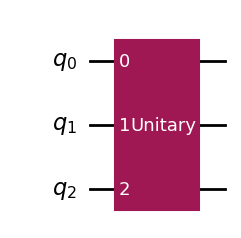

In [27]:
qc = QuantumCircuit(n)
qc.unitary(U, list(range(n)))
qc.draw('mpl')

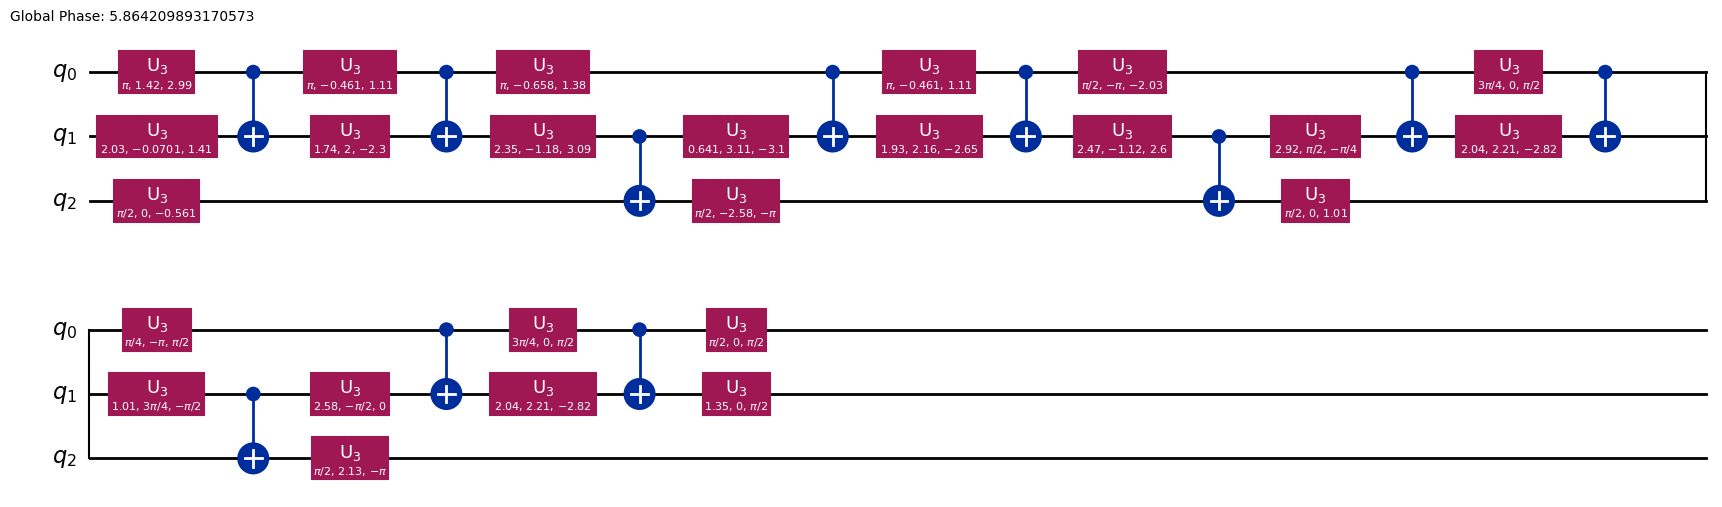

In [28]:
transpiled_qc = transpile(qc, basis_gates=['cx','u3'], optimization_level = 3)
transpiled_qc.draw('mpl')

A seguir vamos usar essa ferramenta para encontrar encontrar a ordem de $5$ módulo $6$ e assim fatorar o número $6$.

In [30]:
from qiskit import QuantumCircuit, transpile

# circuito quântico para a transformação unitária U|y> = |gy mod N> para N=6 e g=5
def qc_U(n):
  U = [[1,0,0,0,0,0,0,0],[0,0,0,0,0,1,0,0],[0,0,0,0,1,0,0,0],[0,0,0,1,0,0,0,0],[0,0,1,0,0,0,0,0],[0,1,0,0,0,0,0,0],[0,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,1]]
  qc = QuantumCircuit(n, name='U')
  qc.unitary(U, list(range(n)))
  transpiled_qc = transpile(qc, basis_gates=['cx','u3'], optimization_level = 3)
  return transpiled_qc

In [31]:
# circuito para aplicar a unitária controlada N vezes
def qc_ctrlu(n,N):
    qc = QuantumCircuit(1+n, name=r'$C_U$'+str(N))
    qcU = qc_U(n)
    for k in range(0,N):
      # transforma circuito pra porta lógica e aplica de forma controlada
      qc.append(qcU.to_gate().control(1), list(range(0,n+1)))
    return qc

In [32]:
# circuito quântico para a inversa da transformada de Fourier quântica
def qc_iqft(n):
    qc = QuantumCircuit(n, name='IQFT')
    if n%2 == 0:
        ul = n//2
    else:
        ul = (n-1)//2
    for p in range(ul-1, -1, -1):
        qc.swap(p, n-1-p)
    for l in range(n-1, -1, -1):
        if l < n-1:
            for q in range(n-1, l+1-1, -1):
                lb = -2*np.pi*2**(-q+l-1)
                qc.cp(lb, q, l)
        qc.h(l)
    return qc

In [33]:
# circuito para o algoritmo de etimativa da ordem de g módulo N
# é basicamente o circuito para estimativa de fase com |u>=|1>
def qc_order_finding(t,n):
    # t = No. qubits do 1º registro; n = No. qubits do 2º registro (U atua no 2º registro), n=ceil(log_2(N))
    qc = QuantumCircuit(t+n, t, name='QOF')
    qc.h(list(range(0,t))) # aplica Hadamard no qubits do 1º registro
    qc.x(t+n-1) # prepara o 2º registro no estado |1>=\sum_k|u_k>/sqrt(tau)
    for j in range(t-1,-1,-1): # aplica as U^N controladas
        N = 2**(t-1-j) # potência da U controlada
        qcctrlu = qc_ctrlu(n,N)
        lista = []
        lista.append(j)
        for l in range(t,t+n):
            lista.append(l)
        qc.append(qcctrlu, lista)
    qciqft = qc_iqft(t) # transformada de Fourier inversa
    qc.append(qciqft, list(range(0,t)))
    qc.measure(list(range(t)),list(range(t))) # medidas
    return qc

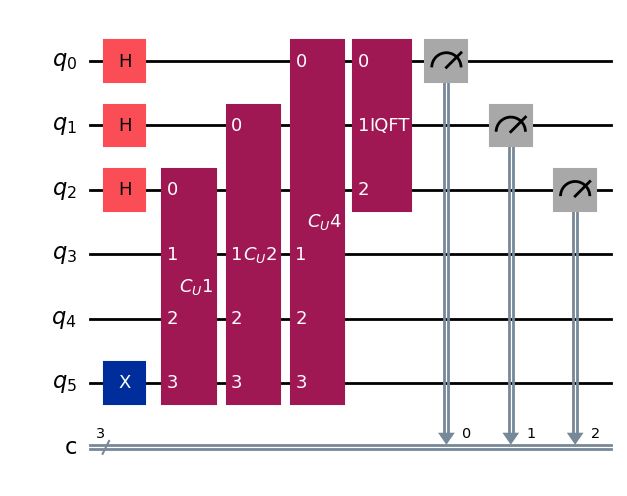

In [34]:
t=3; n=3; qcof = qc_order_finding(t,n)
qcof.draw('mpl')

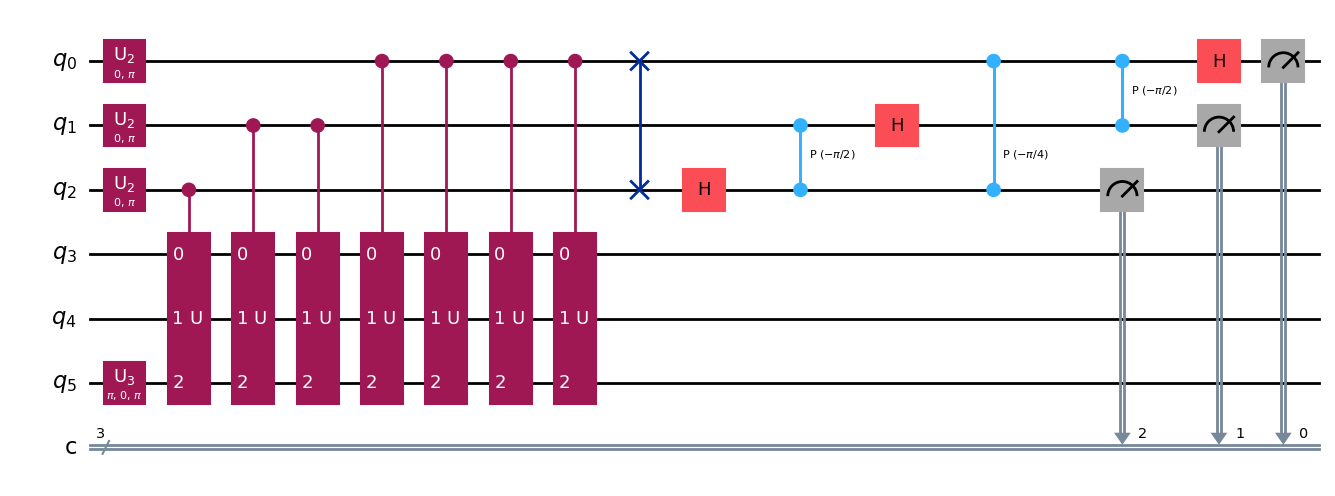

In [35]:
qcof.decompose().draw('mpl')

In [ ]:
#qcof.decompose().decompose().draw('mpl') # o circuito é muito grande ...

In [36]:
from qiskit_aer import AerSimulator
backend = AerSimulator()
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)

In [37]:
qc_list = []
t=3; n=3; qcof = qc_order_finding(t,n)
qc_list.append(qcof.decompose().decompose())

In [38]:
nshots = 2**13 # = 8192
job = sampler.run(qc_list, shots=nshots)

In [39]:
counts = job.result()[0].data.c.get_counts()
counts

{'001': 4157, '000': 4035}

Neste caso, as autofases estimadas são
\begin{align}
\phi_u(001) & \approx 2^{-3}b = 2^{-3}(100) = 2^{-3}(4) = 1/2, \\
\phi_u(000) & \approx 2^{-3}b = 2^{-3}(000) = 2^{-3}(1) = 1/8, \\
\end{align}

Da 1ª já vemos, sem precisar usar o algoritmo das frações continuadas, que
$$\frac{k}{\tau} = \frac{1}{2}\ \therefore\ \tau=2,$$
que concorda com o resultado conhecido.

Tendo o período, podemos testar os novos candidatos a números que compartilham fatores com $N$:
\begin{align}
& g^{\tau/2}+1 = 5^{2/2}+1 = 6, \\
& g^{\tau/2}-1 = 5^{2/2}-1 = 4.
\end{align}
Nesse caso, $g^{\tau/2}+1=N$ e por isso não serve. Por outro lado
$$\gcd(g^{\tau/2}-1,N) = \gcd(4,6)=2>1.$$
Encontramos assim um fator primo do número semi-primo $N=6$. Dividindo por esse fator, encontramos o outro fator primo:
$$\frac{N}{2} = \frac{6}{2} = 3.$$
Com isso, completamos o nosso exemplo e descobrimos que
$$N = 2\times 3.$$

__Exercício:__ Use o algoritmo de Shor para obter os fatores primos do número $N=15.$

## Referências

1. P. W. Shor, “Algorithms for quantum computation: discrete logarithms and factoring,” in Proceedings 35th Annual Symposium on Foundations of Computer Science, Nov. 1994, pp. 124-134. doi: 10.1109/SFCS.1994.365700.

1. P. W. Shor, “Polynomial-Time Algorithms for Prime Factorization and Discrete Logarithms on a Quantum Computer,” SIAM J. Comput., vol. 26, no. 5, pp. 1484-1509, Oct. 1997, doi: 10.1137/S0097539795293172.

1. M. A. Nielsen and I. L. Chuang, Quantum Computation and Quantum Information (Cambridge University Press,Cambridge, 2000).

2. S. Aaronson, The Prime Facts: From Euclid to AKS, https://www.scottaaronson.com/writings/prime.pdf (2003).

1. M. A. Nielsen and I. L. Chuang, Quantum Computation and Quantum Information (Cambridge University Press, Cambridge, England, 2000).

1. Richard Cleve, Introduction to Quantum Information Processing (2023), https://cs.uwaterloo.ca/~cleve/courses/F11CS667/, https://youtube.com/playlist?list=PLgOc9DWm_Ey3cnHXjmu8f__ki5AJYd53p&si=etCdYsFeCUBTgclj.

1. Dave Bacon, Lecture Notes on Quantum Computing (2006), https://courses.cs.washington.edu/courses/cse599d/06wi/.

1. John Preskill, Lecture Notes on Quantum Computation, http://theory.caltech.edu/~preskill/ph219/index.html#lecture.

1. A. Javadi-Abhari et al., “Quantum computing with Qiskit.” arXiv, May 14, 2024. doi: 10.48550/arXiv.2405.08810.

1. 1 Minute Qiskit, How Can I Convert a Unitary Matrix to a set of One & Two Qubit Gates?, https://youtu.be/O2WcZS4yO1Q?si=IePxtg0-3MymAYUb.
